In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [3]:
data = pd.read_csv("./RestaurantUserprofile.csv",low_memory=False)

In [4]:
data.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [5]:
data = data.replace('?',np.nan)
data = data.replace('none',np.nan)

In [6]:
data.columns

Index(['userID', 'latitude', 'longitude', 'smoker', 'drink_level',
       'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos',
       'birth_year', 'interest', 'personality', 'religion', 'activity',
       'color', 'weight', 'budget', 'height'],
      dtype='object')

In [7]:
data_modyfied = data.replace('?',np.nan)
data_modyfied = data_modyfied.replace('none',np.nan)
#modifide qustion mark with nan value

In [8]:
data_modyfied.tail(20)

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
118,U1119,18.964790,-99.260017,false,abstemious,formal,family,public,single,independent,1992,eco-friendly,thrifty-protector,Catholic,student,blue,68,medium,1.68
119,U1120,22.121857,-100.904279,false,abstemious,informal,friends,public,single,independent,1930,variety,hard-worker,NaN,student,green,47,low,1.57
120,U1121,18.871674,-99.183253,false,social drinker,no preference,family,public,married,independent,1987,variety,thrifty-protector,Catholic,working-class,black,90,medium,1.60
121,U1122,22.169601,-100.991821,NaN,abstemious,NaN,NaN,NaN,NaN,NaN,1930,NaN,hard-worker,NaN,NaN,yellow,40,NaN,1.20
122,U1123,23.753112,-99.168567,false,abstemious,informal,family,NaN,single,independent,1987,technology,hard-worker,Catholic,student,green,110,medium,1.75
123,U1124,22.137072,-100.918865,false,casual drinker,informal,friends,public,single,independent,1991,NaN,hard-worker,Catholic,student,blue,51,low,1.20
124,U1125,22.192040,-100.956935,false,casual drinker,formal,friends,public,single,independent,1990,technology,hard-worker,Catholic,student,white,57,low,1.67
125,U1126,22.154210,-100.942233,false,casual drinker,formal,friends,on foot,single,independent,1990,technology,hard-worker,Catholic,student,purple,65,low,1.63
126,U1127,18.943935,-99.206532,false,abstemious,no preference,solitary,public,single,independent,1992,variety,hard-worker,Catholic,student,black,65,low,1.76
127,U1128,22.187236,-100.994213,false,casual drinker,no preference,friends,public,single,independent,1986,variety,thrifty-protector,Catholic,student,red,66,low,1.72


In [9]:
data_modyfied.isna().any()

userID              False
latitude            False
longitude           False
smoker               True
drink_level         False
dress_preference     True
ambience             True
transport            True
marital_status       True
hijos                True
birth_year          False
interest             True
personality         False
religion             True
activity             True
color               False
weight              False
budget               True
height              False
dtype: bool

In [10]:
data_modyfied = data_modyfied.loc[:, data_modyfied.isnull().any()]
data_modyfied

,smoker,dress_preference,ambience,transport,marital_status,hijos,interest,religion,activity,budget
0,false,informal,family,on foot,single,independent,variety,NaN,student,medium
1,false,informal,family,public,single,independent,technology,Catholic,student,low
2,false,formal,family,public,single,independent,NaN,Catholic,student,low
3,false,informal,family,public,single,independent,variety,NaN,professional,medium
4,false,no preference,family,public,single,independent,NaN,Catholic,student,medium
...,...,...,...,...,...,...,...,...,...,...
133,false,no preference,family,public,single,independent,variety,Catholic,student,medium
134,false,informal,family,on foot,single,kids,variety,Catholic,student,low
135,true,no preference,friends,car owner,single,independent,retro,Catholic,student,low
136,false,formal,family,public,single,independent,eco-friendly,Catholic,student,low


In [11]:
# all miss value are object(catagroical data)
data_modyfied.dtypes

smoker              object
dress_preference    object
ambience            object
transport           object
marital_status      object
hijos               object
interest            object
religion            object
activity            object
budget              object
dtype: object

In [12]:
data_modyfied = data_modyfied.fillna(data_modyfied.mode().iloc[-1])
data_modyfied.tail(10)
data=data.fillna(data_modyfied)


In [13]:
for i in data_modyfied.columns:
    print(i,data_modyfied[i].unique())
#we dont have inconsistence data

smoker ['false' 'true']
dress_preference ['informal' 'formal' 'no preference' 'elegant']
ambience ['family' 'friends' 'solitary']
transport ['on foot' 'public' 'car owner']
marital_status ['single' 'married' 'widow']
hijos ['independent' 'kids' 'dependent']
interest ['variety' 'technology' 'retro' 'eco-friendly']
religion ['Catholic' 'Christian' 'Mormon' 'Jewish']
activity ['student' 'professional' 'unemployed' 'working-class']
budget ['medium' 'low' 'high']


In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical=data.select_dtypes(include=numerics)
#numerical.columns ['latitude', 'longitude', 'birth_year', 'weight', 'height']
numerical=numerical.iloc[:,2:]
numerical

,birth_year,weight,height
0,1989,69,1.77
1,1990,40,1.87
2,1989,60,1.69
3,1940,44,1.53
4,1992,65,1.69
...,...,...,...
133,1991,52,1.65
134,1988,66,1.54
135,1990,50,1.60
136,1989,72,1.78


In [19]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

def city_state_country(row):
    coord = f"{row['latitude']}, {row['longitude']}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    row['city'] = city
    row['state'] = state
    row['country'] = country
    return row
    
data=data.apply(city_state_country, axis=1)
data


,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,personality,religion,activity,color,weight,budget,height,city,state,country
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,...,thrifty-protector,Catholic,student,black,69,medium,1.77,San Luis Potosí,San Luis Potosí,México
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,...,hunter-ostentatious,Catholic,student,red,40,low,1.87,San Luis Potosí,San Luis Potosí,México
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,...,hard-worker,Catholic,student,blue,60,low,1.69,San Luis Potosí,San Luis Potosí,México
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,...,hard-worker,Catholic,professional,green,44,medium,1.53,,Morelos,México
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,...,thrifty-protector,Catholic,student,black,65,medium,1.69,,San Luis Potosí,México
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,U1134,22.149654,-100.998610,false,casual drinker,no preference,family,public,single,independent,...,hard-worker,Catholic,student,black,52,medium,1.65,San Luis Potosí,San Luis Potosí,México
134,U1135,22.170396,-100.949936,false,casual drinker,informal,family,on foot,single,kids,...,hunter-ostentatious,Catholic,student,purple,66,low,1.54,,San Luis Potosí,México
135,U1136,22.149607,-100.997235,true,social drinker,no preference,friends,car owner,single,independent,...,thrifty-protector,Catholic,student,black,50,low,1.60,San Luis Potosí,San Luis Potosí,México
136,U1137,22.144803,-100.944623,false,social drinker,formal,family,public,single,independent,...,hard-worker,Catholic,student,blue,72,low,1.78,San Luis Potosí,San Luis Potosí,México


In [ ]:
# fig, ax = plt.subplots(figsize = (12, 7))
# corr = data.corr()
# #sn.heatmap(corr, annot = True)
# sn.heatmap(corr, annot=True, fmt=".1f")

# we notice there is no relationship between two numeric values 

In [ ]:
binns_date=[]
inter_dates=[]

binns_weight=[]
inter_weight=[]


min_val=numerical.birth_year.min()

min_val_weight=numerical.weight.min()-1

for i in range(9):
    binns_date.append(min_val+8*i)
for i in range(8):
    inter_dates.append(str(binns_date[i])+"-"+str(binns_date[i+1]))

for i in range(10):
    binns_weight.append(min_val_weight+10*i)
for i in range(9):
    inter_weight.append(str(binns_weight[i])+"-"+str(binns_weight[i+1]))


df=pd.cut(numerical.weight,bins=binns_weight,labels=inter_weight).rename("weight_cat").to_frame()

df["birth_year_cat"]=pd.cut(numerical.birth_year,bins=binns_date,labels=inter_dates)
df
#cotogorieze the birthday and weight

,weight_cat,birth_year_cat
0,59-69,1986-1994
1,39-49,1986-1994
2,59-69,1986-1994
3,39-49,1938-1946
4,59-69,1986-1994
...,...,...
133,49-59,1986-1994
134,59-69,1986-1994
135,49-59,1986-1994
136,69-79,1986-1994


In [ ]:
data=data.join(df)

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,activity,color,weight,budget,height,city,state,country,weight_cat,birth_year_cat
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,...,student,black,69,medium,1.77,San Luis Potosí,San Luis Potosí,México,59-69,1986-1994
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,...,student,red,40,low,1.87,San Luis Potosí,San Luis Potosí,México,39-49,1986-1994
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,...,student,blue,60,low,1.69,San Luis Potosí,San Luis Potosí,México,59-69,1986-1994
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,...,professional,green,44,medium,1.53,,Morelos,México,39-49,1938-1946
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,...,student,black,65,medium,1.69,,San Luis Potosí,México,59-69,1986-1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,U1134,22.149654,-100.998610,false,casual drinker,no preference,family,public,single,independent,...,student,black,52,medium,1.65,San Luis Potosí,San Luis Potosí,México,49-59,1986-1994
134,U1135,22.170396,-100.949936,false,casual drinker,informal,family,on foot,single,kids,...,student,purple,66,low,1.54,,San Luis Potosí,México,59-69,1986-1994
135,U1136,22.149607,-100.997235,true,social drinker,no preference,friends,car owner,single,independent,...,student,black,50,low,1.60,San Luis Potosí,San Luis Potosí,México,49-59,1986-1994
136,U1137,22.144803,-100.944623,false,social drinker,formal,family,public,single,independent,...,student,blue,72,low,1.78,San Luis Potosí,San Luis Potosí,México,69-79,1986-1994


In [ ]:
data=data.replace('',"notKnow")
data["hasCar"]=data.replace(["public","on foot"],"nocar")["transport"].rename("hasCar")

In [108]:
data.loc[data['transport'].isna()]

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,personality,religion,activity,color,weight,budget,height,city,state,country


In [83]:
data.to_csv('hell.csv')

data.any().value_counts

<bound method IndexOpsMixin.value_counts of userID              True
latitude            True
longitude           True
smoker              True
drink_level         True
dress_preference    True
ambience            True
transport           True
marital_status      True
hijos               True
birth_year          True
interest            True
personality         True
religion            True
activity            True
color               True
weight              True
budget              True
height              True
city                True
state               True
country             True
dtype: bool>

<AxesSubplot:xlabel='city'>

<Figure size 720x720 with 0 Axes>

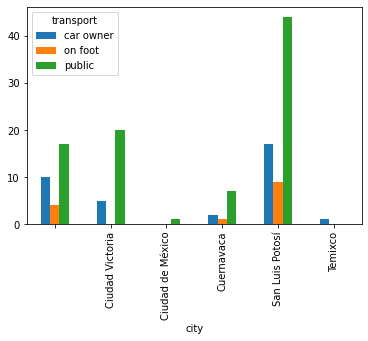

In [143]:
# city_transport=data[['city','transport']].value_counts().sort_values().reset_index()
# city_transport=city_transport.sort_values(by='transport').rename('count')
temp=data.groupby(['city','transport']).size().rename("count").reset_index().pivot(index='city',columns='transport',values='count')
plt.figure(figsize=(10,10))
temp.plot.bar()


